In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
barcolor = ['blue', 'orange', 'green']

# 30 Server

In [3]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_threats_s30.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,rl_act_user,rl_act_time,rl_und_user,rl_und_time,rl_prop_user,rl_prop_time,rl_thres10_user,rl_thres10_time
0,100.0,30.0,45.0,6.897818,41.0,0.026541,77.0,0.167978,70.0,0.012435,77.0,0.019812,77.0,0.012341
1,100.0,30.0,42.0,0.140814,41.0,0.020789,50.0,0.011666,49.0,0.011208,50.0,0.011194,50.0,0.011300
2,100.0,30.0,40.0,0.167810,35.0,0.025199,63.0,0.011811,59.0,0.011184,64.0,0.011244,64.0,0.011242
3,100.0,30.0,43.0,0.164766,42.0,0.026608,70.0,0.011779,67.0,0.011254,70.0,0.011260,70.0,0.011286
4,100.0,30.0,51.0,0.149066,43.0,0.025358,75.0,0.011712,72.0,0.011280,75.0,0.011247,75.0,0.011284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,500.0,30.0,72.0,0.747710,59.0,0.127495,311.0,0.014970,265.0,0.014544,355.0,0.014694,355.0,0.014674
246,500.0,30.0,72.0,0.840029,60.0,0.127422,299.0,0.014259,246.0,0.013873,318.0,0.014070,318.0,0.014003
247,500.0,30.0,69.0,0.784908,51.0,0.125308,278.0,0.014771,246.0,0.014326,318.0,0.014450,318.0,0.014440
248,500.0,30.0,71.0,0.763599,57.0,0.117507,282.0,0.014226,212.0,0.014077,300.0,0.014254,300.0,0.014328


In [4]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('user') #switch between user or server parameter
num_user_und = user_data.mean()[['rl_und_user', 'rl_prop_user', ]]
num_user_und.index = num_user_und.index.astype(int) #change index to integer

num_user_act = user_data.mean()[['rl_prop_user', 'rl_act_user', 'rl_thres10_user']]
num_user_act.index = num_user_act.index.astype(int) #change index to integer
# time = user_data.mean()[['rl_act_time', 'rl_und_time', 'rl_prop_time']]

In [5]:
num_user_und

,rl_und_user,rl_prop_user
user,,
100,59.80,65.14
200,111.10,127.80
300,163.54,194.84
400,206.52,259.46
500,246.24,318.36


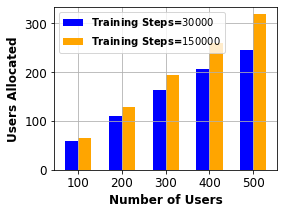

In [6]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user_und.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")
# legend = ["Low Action Space", "Under Trained", 'Properly Trained']
legend = ["Training Steps=$30000$", 'Training Steps=$150000$']
# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left', prop = {'weight':'bold'})
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(4)
fig.set_figheight(3)


fig.savefig(f"plots/alloc_user_threat_s30_und.pdf",dpi=100, bbox_inches = "tight")

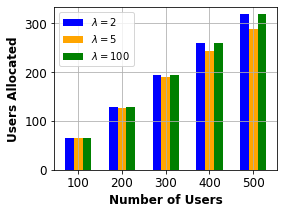

In [7]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user_act.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")
legend = ['$\lambda=2$', "$\lambda=5$", '$\lambda=100$' ]

# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left', prop = {'weight':'bold'})
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(4)
fig.set_figheight(3)


fig.savefig(f"plots/alloc_user_threat_s30_act.pdf",dpi=100, bbox_inches = "tight")

# Users

In [8]:
#==========================================Read Data
data = pd.read_csv(f'allocation_results/allocation_for_threats_u500.csv')
#data['ilp_qoe'] = data['ilp_qoe'].abs() #few results are actually positive but showing negetive
data

,user,server,ilp_user,ilp_time,greedy_user,greedy_time,rl_act_user,rl_act_time,rl_und_user,rl_und_time,rl_prop_user,rl_prop_time,rl_thres10_user,rl_thres10_time
0,500.0,20.0,50.0,7.299817,37.0,0.089169,227.0,0.645333,195.0,0.013269,264.0,0.011303,264.0,0.010304
1,500.0,20.0,44.0,0.495367,34.0,0.085741,214.0,0.010190,164.0,0.009680,238.0,0.009718,238.0,0.009804
2,500.0,20.0,47.0,0.479904,36.0,0.082102,203.0,0.010118,169.0,0.009603,216.0,0.009718,216.0,0.010222
3,500.0,20.0,45.0,0.466777,35.0,0.082125,200.0,0.011088,158.0,0.010107,232.0,0.010088,232.0,0.010780
4,500.0,20.0,44.0,0.471916,40.0,0.091096,252.0,0.010568,186.0,0.010069,281.0,0.010279,286.0,0.010147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,500.0,80.0,181.0,2.458623,141.0,0.323184,442.0,0.033321,418.0,0.032701,446.0,0.032766,446.0,0.032793
196,500.0,80.0,185.0,2.705764,145.0,0.312150,469.0,0.033447,431.0,0.032889,472.0,0.032898,472.0,0.034464
197,500.0,80.0,186.0,2.762404,136.0,0.334886,470.0,0.033650,442.0,0.033081,471.0,0.033181,471.0,0.033230
198,500.0,80.0,182.0,2.474860,138.0,0.313274,441.0,0.034459,390.0,0.032829,447.0,0.032851,447.0,0.032957


In [9]:
# user_data = data.groupby(['user', 'server'])
user_data = data.groupby('server') #switch between user or server parameter
num_user_und = user_data.mean()[['rl_und_user', 'rl_prop_user', ]]
num_user_und.index = num_user_und.index.astype(int) #change index to integer

num_user_act = user_data.mean()[['rl_prop_user', 'rl_act_user', 'rl_thres10_user']]
num_user_act.index = num_user_act.index.astype(int) #change index to integer

In [10]:
num_user_act

,rl_prop_user,rl_act_user,rl_thres10_user
server,,,
20,244.86,212.34,245.08
40,375.92,348.60,375.96
60,438.66,425.42,438.66
80,467.16,462.44,467.16


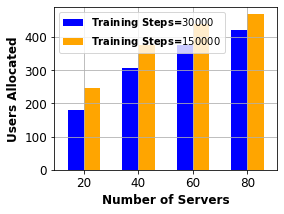

In [11]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user_und.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")
legend = ["Training Steps=$30000$", 'Training Steps=$150000$']
# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left', prop = {'weight':'bold'})
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(4)
fig.set_figheight(3)


fig.savefig(f"plots/alloc_user_threat_u500_und.pdf",dpi=100, bbox_inches = "tight")

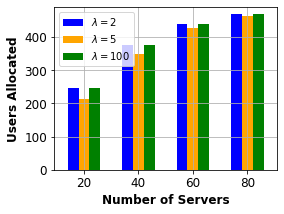

In [12]:
fig, ax = plt.subplots(linewidth=18) #figsize=(10,7) add to increase fig size
num_user_act.plot(ax=ax, kind='bar', color= barcolor, width= 0.6)
ax.set_ylabel('Users Allocated', fontsize=12, fontweight="bold")
legend = ['$\lambda=2$', "$\lambda=5$", '$\lambda=100$' ]
# ax.set_xlabel("Number of Users", fontsize=12, fontweight="bold")
ax.set_xlabel("Number of Servers", fontsize=12, fontweight="bold")
ax.tick_params(axis='both', labelsize=12)

ax.legend(legend, fontsize=10, loc='upper left', prop = {'weight':'bold'})
ax.grid(True)
plt.xticks(rotation=0)

fig.set_figwidth(4)
fig.set_figheight(3)


fig.savefig(f"plots/alloc_user_threat_u500_act.pdf",dpi=100, bbox_inches = "tight")